# GMM in PCA space of ensemble of reanalysis datasets

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as ctp
import seaborn as sns
from sklearn import mixture, decomposition

from latgmm.utils import utenso, preproc, eof, utdata, utstats, metric
import latgmm.geoplot as gpl

plt.style.use("../paper.mplstyle")

## Load data

In [2]:
data_config = dict(
    multivar=False,
    variables=['sst'],
    source='reanalysis',
    timescale='monthly',
    lon_range=[130, -70],
    lat_range=[-31, 32],
)
dirpath = "../data/reanalysis/monthly/"
if (data_config['multivar'] is False) & (len(data_config['variables']) == 1):
    data_config['filenames'] = [
        dict(name='COBE2',   path=dirpath+"/COBE/sst_cobe2_month_1850-2019.nc"),
        dict(name='ErSSTv5', path=dirpath+"/ERSSTv5/sst_ersstv5_month_1854-present.nc"),
        dict(name='HadISST', path=dirpath+"/HadISST/sst_hadisst_month_1870-present.nc"),
        dict(name='ORAS5',   path=dirpath+"/ORAS5/oceanvars_ORAS5_1x1.nc"),
        dict(name='GODAS',   path=dirpath+"/GODAS/sst_godas_month_1980-present.nc"),
        dict(name='SODA',    path=dirpath+"/SODA/sst_SODA_month_1980-2017.nc"),
        dict(name='ERA5',    path=dirpath+"/ERA5/sea_surface_temperature_era5_monthly_sp_1940-2022_1.0x1.0.nc"),
        dict(name='CERA-20c',path=dirpath+"/CERA-20C/sst_cera20c_1901-2009_r1x1.nc"),
    ]
    data_config['splity'] = ['2005-01-01', '2022-01-01']
elif data_config['multivar'] & (data_config['timescale'] == 'monthly'):
    data_config['filenames']=[
        dict(name='SODA',     path=dirpath+f"/SODA/oceanvars_SODA_1x1.nc"),
        dict(name='GODAS',    path=dirpath+f"/CODAS/oceanvars_GODAS_1x1.nc"),
        dict(name='ORAS5',    path=dirpath+f"/ORAS5/oceanvars_ORAS5_1x1.nc"),
        dict(name='CERA-20c', path=dirpath+f"/CERA-20C/oceanvars_CERA20C_1x1.nc"),
    ]
else:
    raise ValueError(f"No data are loaded due to specified timescale and variables!")

data_config['detrend_from'] = '1950'
data_config['normalization'] ='zscore'

data = utdata.load_data(**data_config)
ds = data['full']

Open file COBE2
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file ErSSTv5
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file HadISST
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file ORAS5
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file GODAS
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file SODA
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file ERA5
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Open file CERA-20c
Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Get selected area: lon=[-50 110], lat=[-31, 32]!
Interpolate grid on res 1
Detrend and compute anomalies:


/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds['time'] = np.array(ds['time'], dtype='datetime64[M]')
/home/jakob/Code/LatentGMM/latgmm/utils/utdata.py:190: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can

Convert train data to torch.Dataset!
Convert val data to torch.Dataset!
Convert test data to torch.Dataset!


### EOF transformation

In [3]:
n_components = 2
sppca = eof.SpatioTemporalPCA(ds, n_components=n_components)
eofs = sppca.get_eofs()
pcs = sppca.get_principal_components()
print(f"Explained variance: {np.sum(sppca.explained_variance())}")

Explained variance: 0.4810432711818489


array([<GeoAxes: >, <GeoAxes: >], dtype=object)

/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


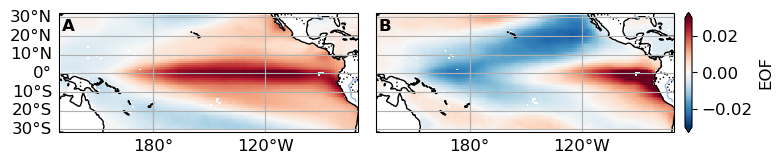

In [4]:
# EOF maps
vars = list(ds.data_vars)
fig = plt.figure(figsize=(7, 2*len(vars)))
proj = ctp.crs.PlateCarree(central_longitude=180)
axs = []
for i in range(sppca.n_components):
    comp = eofs.isel(eof=i)
    for j, var in enumerate(vars):
        ax = fig.add_subplot(len(vars), sppca.n_components, i+sppca.n_components*j+1, projection=proj)
        im = gpl.plot_map(comp[var], central_longitude=180, ax=ax,
                     bar='continuous', vmin=-.03, vmax=.03, add_bar=False)
        im['gl'].top_labels = False 
        if i > 0:
            im['gl'].left_labels = False 
        axs.append(ax)
        
cbar_ax = fig.add_axes([0.99, .2, 0.01, 0.6])
cb = fig.colorbar(im['im'], cax=cbar_ax, orientation='vertical', shrink=0.6, extend='both')
cb.set_label(label=rf"EOF")

gpl.enumerate_subplots(axs, pos_x=.01, pos_y=.85)

### Get ENSO events

In [5]:
reload(utenso)
month_range=[12, 2]
x_enso, x_events = utenso.select_enso_events(ds, month_range=month_range)
z_enso = xr.DataArray(
    data=sppca.transform(x_enso),
    coords={'time': x_enso['time'].data, 'eof': np.arange(1, sppca.n_components+1)}
).assign_coords(member=('time', x_enso['member'].data))
z_events = xr.DataArray(
    data=sppca.transform(x_events),
    coords={'time': x_events['time'].data, 'eof': np.arange(1, sppca.n_components+1)}
).assign_coords(member=('time', x_events['member'].data))

## Plot latent encoding

Text(0, 0.5, 'PC2')

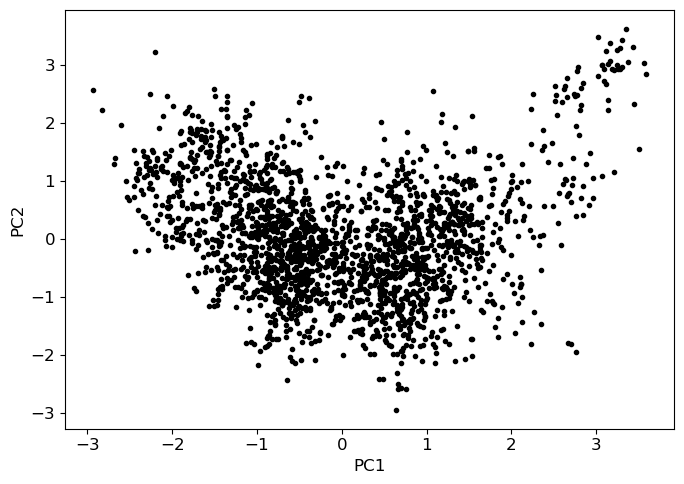

In [6]:
fig, ax = plt.subplots()
ax.plot(z_enso.isel(eof=0), z_enso.isel(eof=1), '.', color='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0, 0.5, 'PC2')

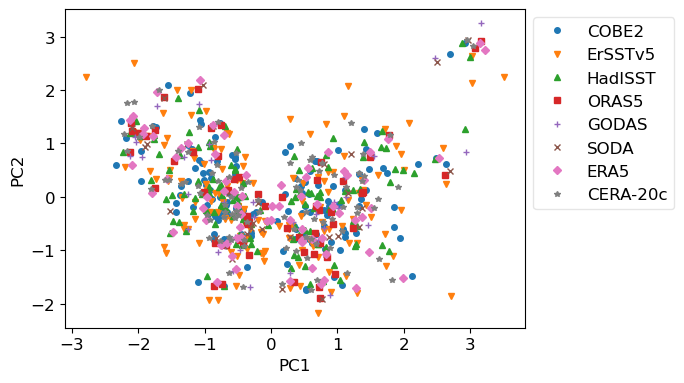

In [7]:
# Check differences between datasets
plparam = { 
    'COBE2':    dict(linestyle='', marker='o', markersize=4),
    'ErSSTv5':     dict(linestyle='', marker='v', markersize=4),
    'HadISST':  dict(linestyle='', marker='^', markersize=4), 
    'ORAS5':    dict(linestyle='', marker='s', markersize=4), 
    'GODAS':  dict(linestyle='', marker='+', markersize=4),
    'SODA':    dict(linestyle='', marker='x', markersize=4), 
    'ERA5':     dict(linestyle='', marker='D', markersize=4), 
    'CERA-20c':     dict(linestyle='', marker='*', markersize=4), 
}

fig, ax = plt.subplots(figsize=(7,4))
for i, dname in enumerate(data_config['filenames']):
    idx = np.where(x_events['member'].data == dname['name'])[0]
    ax.plot(z_events.isel(eof=0)[idx], z_events.isel(eof=1)[idx], label=dname['name'],
            **plparam[dname['name']])

ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

## Reconstruction loss

In [8]:
x_test, _ = utenso.select_enso_events(data['val'].dataset)
x_hat_test = sppca.reconstruction(x_test).transpose('time', 'lat', 'lon')
x_flat, _ = eof.map2flatten(x_test)
x_hat_flat, _ = eof.map2flatten(x_hat_test)
metric_dict = dict(
    var= "_".join(list(x_test.data_vars)), 
    z=sppca.pca.n_components,
    mse = ((x_hat_flat - x_flat)**2).mean(skipna=True).data,
    fuv=metric.fraction_unexplained_variance(x_flat.data, x_hat_flat.data),
) 
# Print metrics
for key, value in metric_dict.items():
    print(f"{key}: {value}")

var: ssta
z: 2
mse: 0.6132790703360103
fuv: 0.4281271371026112


## Gaussian mixture 

### Scan number of cluster

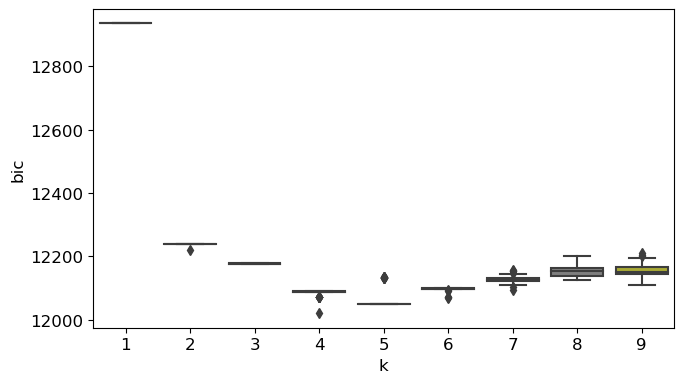

In [9]:
n_classes = np.arange(1, 10, 1)
n_runs = 50
result = []
for k in n_classes:
    for r in range(n_runs):
        gmm = mixture.GaussianMixture(n_components=k, 
                                      covariance_type='full', max_iter=100)
        gmm.fit(z_enso.data)
        result.append(
            {'k': k, 'bic': gmm.bic(z_enso.data), 'gmm': gmm}
        )
result = pd.DataFrame(result)

fig, ax = plt.subplots(figsize=(7,4))
ax = sns.boxplot(data=result, x='k', y='bic', ax=ax)

### Plot GMM

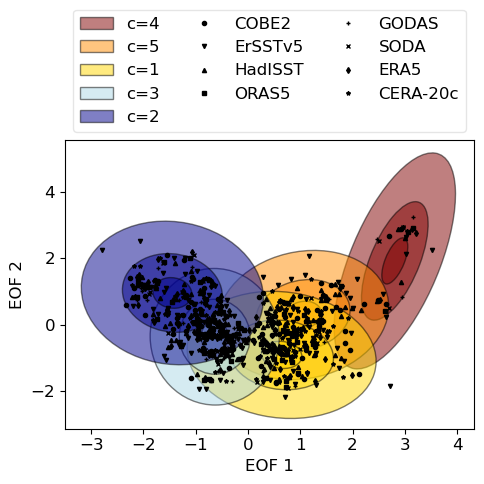

In [10]:
# Train GMM
n_cluster=5
n_rand = 42 
gmm_pca = mixture.GaussianMixture(n_components=n_cluster, 
                      covariance_type='full', max_iter=100,
                      random_state=n_rand)
gmm_pca.fit(z_enso.data)

# Plotting
plparam = { 
    'COBE2':    dict(linestyle='', marker='o', markersize=3),
    'ErSSTv5':  dict(linestyle='', marker='v', markersize=3),
    'HadISST':  dict(linestyle='', marker='^', markersize=3), 
    'ORAS5':    dict(linestyle='', marker='s', markersize=3), 
    'GODAS':    dict(linestyle='', marker='+', markersize=3),
    'SODA':     dict(linestyle='', marker='x', markersize=3), 
    'ERA5':     dict(linestyle='', marker='d', markersize=3), 
    'CERA-20c': dict(linestyle='', marker='*', markersize=3), 
}

fig, ax = plt.subplots(figsize=(5,5))

# Plot gmm means
gmm_order = np.arange(gmm_pca.means_.shape[0]) 
gmm_order = np.array([4, 5, 1, 3, 2]) -1 # all sst 
gmclrs = ['maroon', 'darkorange', 'gold', 'lightblue', 'darkblue', 'black']
for i, k in enumerate(gmm_order):
    mean = gmm_pca.means_[k, :]
    if gmm_pca.covariance_type == "full":
        Sigma = gmm_pca.covariances_[k, :]
    elif gmm_pca.covariance_type == "diag":
        Sigma = np.diag(gmm_pca.covariances_[k, :])

    gmkwargs= dict(fill=False)
    if gmclrs is not None:
        gmkwargs['ec'] = 'k' #gmclrs[i] 
        gmkwargs['fc'] = gmclrs[i] 
        gmkwargs['fill'] = True
        gmkwargs['alpha'] = 0.5

    for p in [0.9, 0.5, 0.1]:
        if p==0.1:
            gmkwargs['label'] = f"c={k+1}"
        gpl.plot_2dgaussian(mean, Sigma,
                             ax=ax, p=p, **gmkwargs)

ax.set_xlabel("EOF 1")
ax.set_ylabel("EOF 2")

for i, dname in enumerate(data_config['filenames']):
    idx = np.where(x_events['member'].data == dname['name'])[0]
    ax.plot(z_events.isel(eof=0)[idx], z_events.isel(eof=1)[idx], color='k', label=dname['name'],
            **plparam[dname['name']])

ax.legend(bbox_to_anchor=(0., 1.0, 1., 0.1), loc="lower left", ncol=3, mode='expand')

/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/jakob/Software/mambaforge/envs/latgmmenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


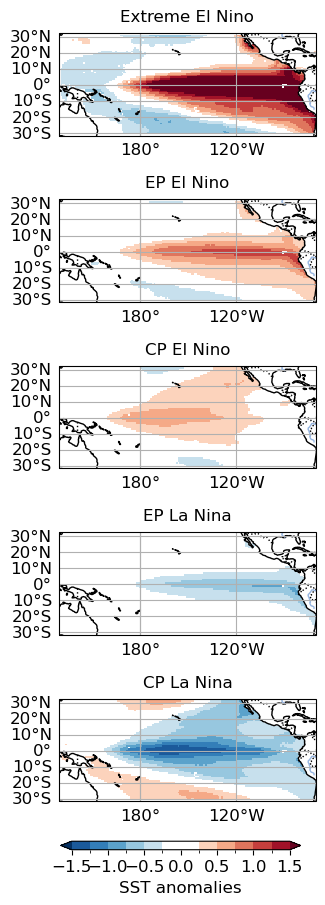

In [11]:
# Plot mean of Gaussian mixtures
plparam = {'ssta': dict(vmin=-1.5, vmax=1.5, step=0.25, cmap='RdBu_r', centercolor="#ffffff"),
           'ssha': dict(vmin=-.15, vmax=.15, step=0.025,cmap='RdGy_r', centercolor="#ffffff")}
labels = ['Extreme El Nino', 'EP El Nino', 'CP El Nino', 'EP La Nina', 'CP La Nina',]

means = sppca.inverse_transform(gmm_pca.means_, newdim='mu')
# Unnormalize
if data_config['normalization'] is not None:
    for var in list(ds.data_vars):
        means[var] = ds.attrs[var]['normalizer'].inverse_transform(means[var])

vars = ds.data_vars
fig = plt.figure(figsize=(4*len(vars), 1.7*len(gmm_order)))
proj = ctp.crs.PlateCarree(central_longitude=180)
for i, k in enumerate(gmm_order):
    mu = means.sel(mu=k)
    for j, var in enumerate(vars):
        idx = len(vars)*i+j+1
        ax = fig.add_subplot(len(gmm_order), len(vars), idx, projection=proj)
        im = gpl.plot_map(mu[var], central_longitude=180, ax=ax, 
                          bar='discrete', add_bar=False, **plparam[var])
        im['gl'].top_labels = False 
#        ax.set_title(rf"$c_{k+1}$", fontsize=14)
        ax.set_title(labels[i], fontsize=12)

# Shared colorbar
cbar_ax = fig.add_axes([0.2, -.01, 0.6, 0.01])
cbar = plt.colorbar(im['im'], orientation='horizontal', shrink=0.7,
                    cax=cbar_ax, extend='both')
cbar.set_label(f"SST anomalies", size=12)

In [12]:
# Save means
if False:
    means.attrs['gmm_sort'] = gmm_order
    means.to_netcdf("../output/pcgmm/pcgmm_sst_means.nc")

## Probabilistic weights

In [13]:
# Event weights
p_c_given_x = utenso.posterior_weights(
    z_events.data, means=gmm_pca.means_, covariances=gmm_pca.covariances_,
    prior_weights=gmm_pca.weights_
)
# convert to xarray
p_c_given_x_da = xr.DataArray(data=p_c_given_x, dims=['time', 'classes'], 
                              coords={ 
                                'time': z_events['time'].data,
                                'member': ('time', z_events['member'].data),
                                'classes': np.arange(p_c_given_x.shape[1]) + 1
                              })

# Mean posterior weights
timepoints = np.unique(p_c_given_x_da['time'].data)
p_c_given_x_mean = []
p_c_given_x_std = []
for t in timepoints:
    weight = p_c_given_x_da.sel(time=t)
    if len(weight.shape) > 1:
        p_c_given_x_mean.append(weight.mean(dim='time').data)
        p_c_given_x_std.append(weight.std(dim='time').data)
    else:
        p_c_given_x_mean.append(weight.data)
        p_c_given_x_std.append(np.zeros(shape=5))

p_c_given_x_mean = xr.DataArray(data=p_c_given_x_mean, coords={'time':timepoints, 'classes':p_c_given_x_da['classes']})        
p_c_given_x_std = xr.DataArray(data=p_c_given_x_std, coords={'time':timepoints, 'classes':p_c_given_x_da['classes']})        

array([<Axes: ylabel='$p(c_4|z)$'>, <Axes: ylabel='$p(c_5|z)$'>,
       <Axes: ylabel='$p(c_1|z)$'>, <Axes: ylabel='$p(c_3|z)$'>,
       <Axes: ylabel='$p(c_2|z)$'>], dtype=object)

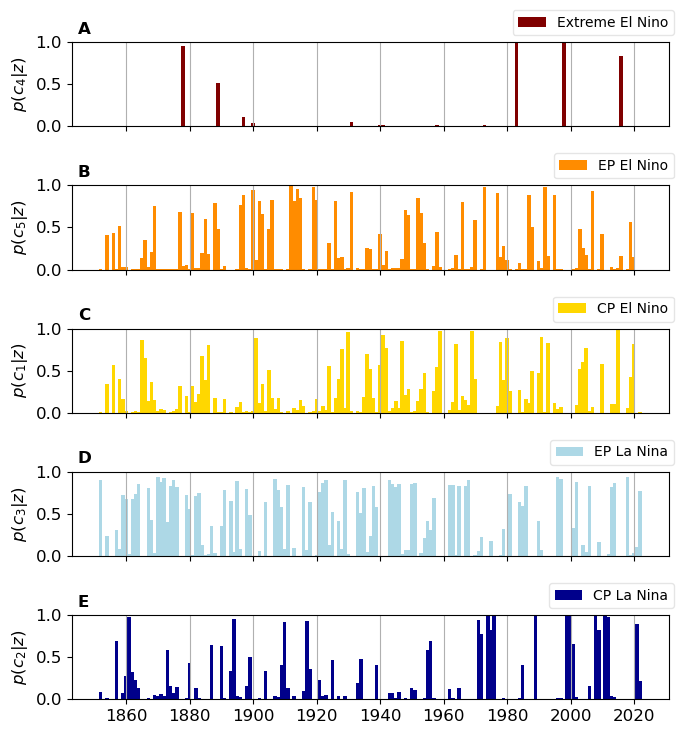

In [14]:
#  Plot posterior weights
labels = ['Extreme El Nino', 'EP El Nino', 'CP El Nino', 'EP La Nina', 'CP La Nina',]
n_samples, n_classes = p_c_given_x.shape
fig, axs = plt.subplots(n_classes, 1, figsize=(7, 1.5*n_classes), sharex='col', sharey='row')

for i, k in enumerate(gmm_order):
    axs[i].bar(p_c_given_x_mean['time'].data, height=p_c_given_x_mean.sel(classes=k+1),
                 width=4e2, color=gmclrs[i], label=labels[i])
    axs[i].grid(axis='x')
    axs[i].set_ylabel(rf'$p(c_{k+1}|z)$')
    axs[i].set_ylim([0,1])
    axs[i].set_yticks([0, .5, 1])
    axs[i].legend(bbox_to_anchor=(.72, 1.0, 0.3, 0.1), loc="lower right", fontsize=10)

gpl.enumerate_subplots(axs, pos_x=0.01, pos_y=1.1, fontsize=12)


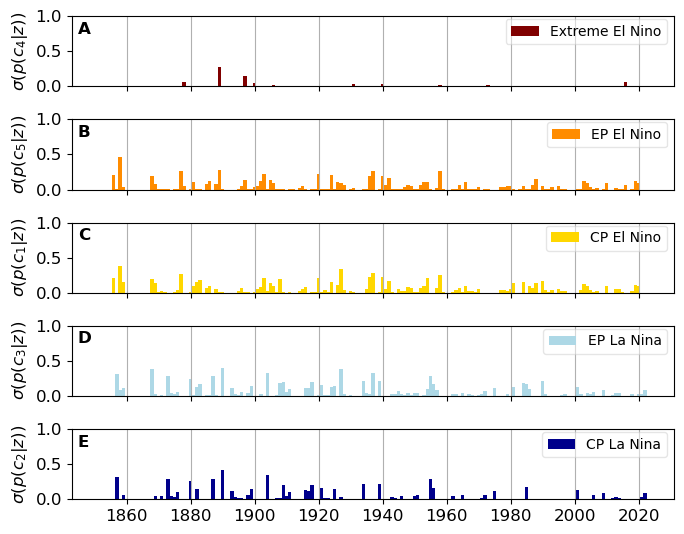

In [15]:
# Std of weights between datasets
labels = ['Extreme El Nino', 'EP El Nino', 'CP El Nino', 'EP La Nina', 'CP La Nina',]
fig, axs = plt.subplots(n_classes, 1, figsize=(7, 1.1*n_classes), sharex='col', sharey='row')

for i, k in enumerate(gmm_order):
    axs[i].bar(p_c_given_x_std['time'].data, height=p_c_given_x_std.sel(classes=k+1),
                 width=4e2, color=gmclrs[i], label=rf"{labels[i]}")
    axs[i].grid(axis='x')
    axs[i].set_ylabel(rf'$\sigma ( p(c_{k+1}|z))$')
    axs[i].set_ylim([0,1])
    axs[i].set_yticks([0, .5, 1])
    axs[i].legend(bbox_to_anchor=(.7, .5, 0.3, 0.1), loc="lower right", fontsize=10)

_ = gpl.enumerate_subplots(axs, pos_x=0.01, pos_y=.75, fontsize=12)

Compute monthly weights

In [16]:
# Monthly weights
p_c_given_x_month = utenso.posterior_weights(
    z_enso.data, means=gmm_pca.means_, covariances=gmm_pca.covariances_,
    prior_weights=gmm_pca.weights_
)
# convert to xarray
p_c_given_x_month = xr.DataArray(data=p_c_given_x_month, dims=['time', 'classes'], 
                              coords={ 
                                'time': z_enso['time'].data,
                                'member': ('time', z_enso['member'].data),
                                'classes': np.arange(p_c_given_x_month.shape[1]) + 1
                              })

# Mean posterior weights
timepoints = np.unique(p_c_given_x_month['time'].data)
weight_month_mean = []
weight_month_std = []
for t in timepoints:
    weight = p_c_given_x_month.sel(time=t)
    if len(weight.shape) > 1:
        weight_month_mean.append(weight.mean(dim='time').data)
        weight_month_std.append(weight.std(dim='time').data)
    else:
        weight_month_mean.append(weight.data)
        weight_month_std.append(np.zeros(shape=5))

weight_month_mean = xr.DataArray(data=weight_month_mean, coords={'time':timepoints, 'classes':p_c_given_x_month['classes']})        
weight_month_std = xr.DataArray(data=weight_month_std, coords={'time':timepoints, 'classes':p_c_given_x_month['classes']})        

In [17]:
# Save probability weights
if False:
    p_c_given_x_mean.attrs['gmm_sort'] = gmm_order
    p_c_given_x_mean.name = 'p_c_given_x'
    p_c_given_x_mean.to_netcdf("../output/pcgmm/pcgmm_weights_events_mean_sst.nc")
if False:
    weight_month_mean.attrs['gmm_sort'] = gmm_order
    weight_month_mean.name = 'p_c_given_x'
    weight_month_mean.to_netcdf("../output/pcgmm/pcgmm_weights_mon_mean_sst.nc")

## Decadal variability of Nino3.4

In [18]:
product = 'HadISST' #'COBE2','ErSSTv5','HadISST', 'ORAS5', 'GODAS', 'SODA', 'ERA5', 'CERA-20c' 
for fnames in data_config['filenames']:
    if fnames['name'] == product:
        filepath = fnames['path']
    
ssta = preproc.process_data(
        filepath, vars=['sst'], antimeridian=True,
        climatology='month', normalization=None, detrend_from=1950 
)['ssta']
nino_indices = utenso.get_nino_indices(ssta, antimeridian=True)
nino_indices = nino_indices.sel(time=slice(None, '2021-12-31'))

Sort longitudes and latitudes in ascending order, respectively
Process sst:
Roll longitudes.
Set the dateline to the new longitude zero.
Detrend and compute anomalies:


Monthly weighting of Nino3.4:

In [19]:
weights = weight_month_mean
nino34 = nino_indices['nino34']
# Make sure weights and nino-indices are on the same time points
tmax = nino34['time'].max() if nino34['time'].max() < weights['time'].max() else weights['time'].max()
tmin = nino34['time'].min() if nino34['time'].min() > weights['time'].min() else weights['time'].min()
nino34 = nino34.sel(time=slice(tmin.data, tmax.data)).rolling(time=3, center=True).mean()
weights = weights.sel(time=slice(tmin.data, tmax.data))
weights['time'] = np.array(weights['time'].data, dtype='datetime64[M]')
nino34['time'] = np.array(nino34['time'].data, dtype='datetime64[M]')

nino34 = nino34.sel(time=weights['time'])

/tmp/ipykernel_59485/253984587.py:8: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  weights['time'] = np.array(weights['time'].data, dtype='datetime64[M]')
/tmp/ipykernel_59485/253984587.py:8: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by conve

array([<Axes: ylabel='Nino3.4'>, <Axes: xlabel='density'>], dtype=object)

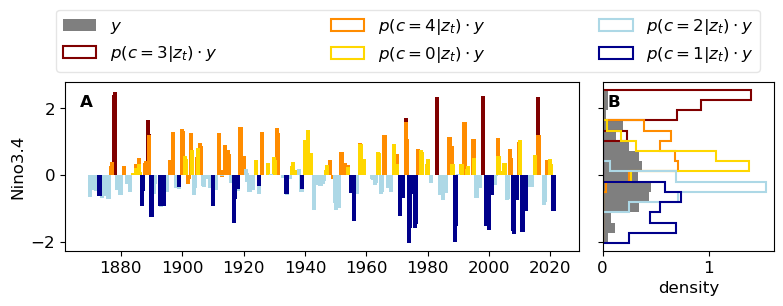

In [20]:
fig, axs = plt.subplots(1, 2, 
                        width_ratios=[3,1],
                        figsize=(8, 2.5),
                        sharey=True)
#axs[0].bar(nino34['time'].data, height=nino34.data, width=4e2, label=rf'y', color='k')
im, bins, _ = axs[1].hist(nino34.data, bins='auto', density=True, orientation='horizontal',
                          histtype='bar', color='k', alpha=.5, label=rf'$y$')
for i, k in enumerate(gmm_order):
    n34_k = nino34 * weights.sel(classes=k+1)
    idx_nonzero = np.where(weights.sel(classes=k+1).data > 0.55)[0]
    n34_k = n34_k[idx_nonzero]
    axs[0].bar(n34_k['time'].data, height=n34_k.data, width=5e2,
                   color=gmclrs[i])#, label=rf'$p(c={k}|z_t) \cdot y$')
    axs[1].hist(n34_k.data, bins=bins, density=True, orientation='horizontal',
                histtype='step', color=gmclrs[i], linewidth=1.5, #alpha=.4,
                label=rf'$p(c={k}|z_t) \cdot y$')

axs[0].set_ylabel(f'$p_i \cdot y$')
axs[0].set_ylabel("Nino3.4")
axs[1].set_xlabel("density")
#axs[1].legend(bbox_to_anchor=(1., .1, .6, 1.), loc="lower left", ncol=1)
fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.07, 1.15, .9, 0.1), mode='expand')
gpl.enumerate_subplots(axs, pos_x=0.03, pos_y=.85, fontsize=12)

### Decadal variability

In [21]:
def rolling_window_covariance(da: xr.DataArray, window_size: int):
    covs = []
    times = []
    for i in range(window_size-1, len(da['time'])):
        # Select window
        chunk = da.isel(time=slice(i-window_size+1, i+1))
        # Compute covariance
        cov = np.cov(chunk.data)
        covs.append(cov)
        times.append(chunk.isel(time=int(window_size/2))['time'].data)
    
    return np.array(covs), np.array(times)


# Weights and Nino3.4 should span same time period
nino34 = nino34.sel(time=slice("1855-12-01", None))
weights = weights.sel(time=slice("1855-12-01", None)) 

# Weighted Nino3.4
nino34_k = []
for k in weights['classes']:
    nino34_k.append(nino34 * weights.sel(classes=k))
nino34_k = xr.concat(nino34_k, dim=pd.Index(weights['classes'].data, name='classes'))

# Rolling mean variance over n_years
n_years = 30
nino34_var, times = rolling_window_covariance(nino34, window_size=3*n_years)
nino34_var = xr.DataArray(nino34_var, coords=dict(time=times))
nino34_k_cov, times = rolling_window_covariance(nino34_k, window_size=3*n_years)
nino34_k_cov = xr.DataArray(nino34_k_cov, coords=dict(time=times, c1=nino34_k['classes'].data, c2=nino34_k['classes'].data))

# Sum of covariances
n_times, n_features, _ = nino34_k_cov.shape
sum_covariances = np.zeros(n_times)
for i in range(n_features):
    for j in range(i+1, n_features):
        sum_covariances += nino34_k_cov.data[:, i, j]
nino34_k_cov_sum = xr.DataArray(2*sum_covariances, coords=dict(time=nino34_k_cov['time'].data))

In [22]:
# Stack plot every 10 years
n_step = 10
# Time points
year_arr = np.arange(np.array(nino34_k_cov['time'].min().data, dtype='datetime64[Y]'),
                     np.array(nino34_k_cov['time'].max().data, dtype='datetime64[Y]') + np.timedelta64(2, 'Y'),
                     step=n_step, dtype='datetime64[Y]')
time_arr = np.array([f"{y}-01-01" for y in year_arr], dtype='datetime64[D]')
# Select time points and stack plots
stacked_lines = [(nino34_k_cov.sel(time=time_arr, method='nearest').isel(c1=k, c2=k) / nino34_var
                  ) for k in gmm_order]
stacked_lines.append(
    nino34_k_cov_sum.sel(time=time_arr, method='nearest') / nino34_var
)

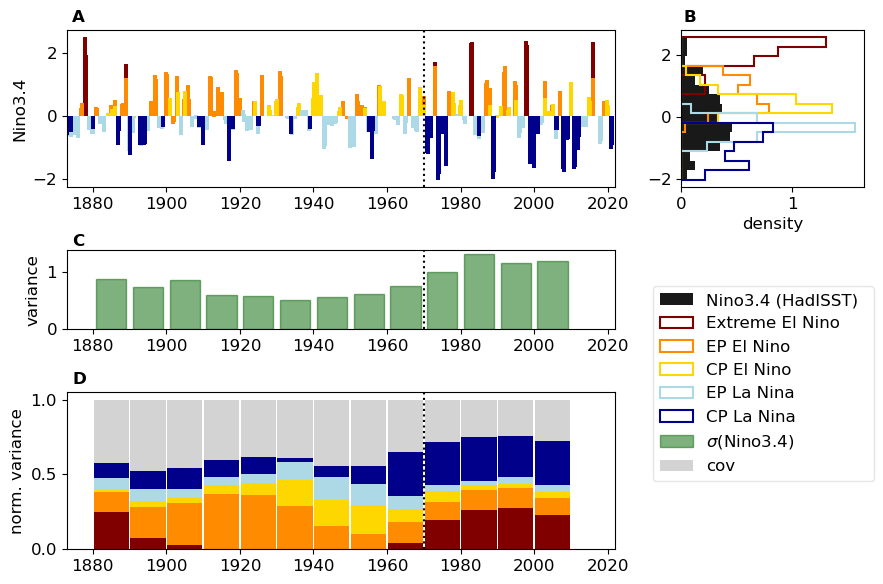

In [23]:
import matplotlib.gridspec as gridspec
class_names = ['Extreme El Nino', 'EP El Nino', 'CP El Nino', 'EP La Nina', 'CP La Nina',]
clrs = gmclrs[:len(gmm_order)]
clrs.append('lightgrey')
labels = [rf"k={k}" for k in gmm_order]
labels.append("cov")
nrows, ncols = (3, 2)
fig = plt.figure(figsize=(9, nrows*2.))
gs = gridspec.GridSpec(nrows, ncols, width_ratios=[3,1], height_ratios=[2,1,2])
axs = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1])]
axs.append(fig.add_subplot(gs[1,0], sharex=axs[0]))
axs.append(fig.add_subplot(gs[2,0], sharex=axs[0]))
axs.append(fig.add_subplot(gs[1:,1]))

# Nino34 time-series and hisplot
im, bins, _ = axs[1].hist(nino34.data, bins='auto', density=True, orientation='horizontal',
                          histtype='bar', color='k', alpha=.9, label=f'Nino3.4 ({product})')
for i, k in enumerate(gmm_order):
    n34_k = nino34 * weights.sel(classes=k+1)
    idx_nonzero = np.where(weights.sel(classes=k+1).data > 0.5)[0]
    n34_k = n34_k[idx_nonzero]
    axs[0].bar(n34_k['time'].data, height=n34_k.data, width=4e2,
                   color=gmclrs[i])
    axs[1].hist(n34_k.data, bins=bins, density=True, orientation='horizontal',
                histtype='step', color=gmclrs[i], linewidth=1.5, #alpha=.4,
                label=class_names[i])
#                label=r'$p(c_{k}|z_t) \cdot y$'.replace('k', str(k+1)))
axs[0].set_xlim(np.min(n34_k['time']).data, np.max(n34_k['time']).data)
axs[0].set_ylabel("Nino3.4")
axs[0].axvline(np.datetime64('1970-01-01'), ls=':', color='k')

axs[1].set_xlabel(r"density")

# Variance of Nino34
years = np.arange(np.array(nino34_var['time'].min().data, dtype='datetime64[Y]'),
                  np.array(nino34_var['time'].max().data, dtype='datetime64[Y]') + np.timedelta64(2, 'Y'),
                  step=10, dtype='datetime64[Y]')
variance = nino34_var.sel(time=years, method='nearest')
#axs[2].plot(nino34_var['time'], nino34_var, color='darkgreen',
#           label=r'$\sigma_{30y}$ (Nino3.4)')
#axs[2].fill_between(nino34_var['time'], np.zeros(len(nino34_var['time'])), nino34_var, color='darkgreen', alpha=.5)
axs[2].bar(years, height=variance, width=3e3, color='darkgreen', edgecolor='darkgreen', alpha=.5, 
           label=r'$\sigma$(Nino3.4)')
axs[2].set_ylabel(r"variance")
axs[2].axvline(np.datetime64('1970-01-01'), ls=':', color='k')

# Decadel variability
bottom = np.zeros_like(stacked_lines[0])
for i, stack in enumerate(stacked_lines):
    axs[3].bar(time_arr, stack, bottom=bottom, width=3.5e3, color=clrs[i], label=labels[i])
    bottom += stack
axs[3].set_ylabel(r"norm. variance")
axs[3].axvline(np.datetime64('1970-01-01'), ls=':', color='k')

# Legend in seperate subplot
hands, labs = axs[1].get_legend_handles_labels()
hand2, lab2 = axs[2].get_legend_handles_labels()
hand3, lab3 = axs[3].get_legend_handles_labels()
hands.append(hand2[-1])
hands.append(hand3[-1])
labs.append(lab2[-1])
labs.append(lab3[-1])
axs[4].legend(hands, labs, bbox_to_anchor=(-.2, .2, 1.3, 1.), loc="lower left", mode='expand')
axs[4].axis('off')

_ = gpl.enumerate_subplots(axs[:4], pos_x=0.01, pos_y=1.05, fontsize=12)

### Check consistency with duration of window

array([<Axes: ylabel='$\\overline{\\sigma}$ (w=20y)'>,
       <Axes: ylabel='$\\overline{\\sigma}$ (w=30y)'>,
       <Axes: ylabel='$\\overline{\\sigma}$ (w=40y)'>], dtype=object)

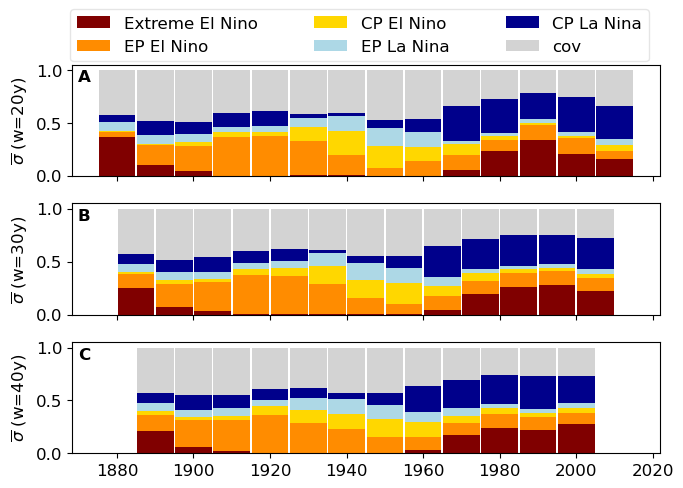

In [24]:
n_step = 10
window_arr = [20, 30, 40]
nrows = len(window_arr) 
class_names = ['Extreme El Nino', 'EP El Nino', 'CP El Nino', 'EP La Nina', 'CP La Nina', 'cov']

fig, axs = plt.subplots(nrows, 1, figsize=(7, nrows*1.5), sharex=True)


for i, n_years in enumerate(window_arr):
    nino34_var, times = rolling_window_covariance(nino34, window_size=3*n_years)
    nino34_var = xr.DataArray(nino34_var, coords=dict(time=times))
    nino34_k_cov, times = rolling_window_covariance(nino34_k, window_size=3*n_years)
    nino34_k_cov = xr.DataArray(nino34_k_cov, coords=dict(time=times, c1=nino34_k['classes'].data, c2=nino34_k['classes'].data))
    
    # Sum of covariances
    n_times, n_features, _ = nino34_k_cov.shape
    sum_covariances = np.zeros(n_times)
    for j in range(n_features):
        for k in range(j+1, n_features):
            sum_covariances += nino34_k_cov.data[:, j, k]
    nino34_k_cov_sum = xr.DataArray(2*sum_covariances, coords=dict(time=nino34_k_cov['time'].data))
    
    year_arr = np.arange(np.array(nino34_k_cov['time'].min().data, dtype='datetime64[Y]'),
                         np.array(nino34_k_cov['time'].max().data, dtype='datetime64[Y]') + np.timedelta64(2, 'Y'),
                         step=n_step, dtype='datetime64[Y]')
    time_arr = np.array([f"{y}-01-01" for y in year_arr], dtype='datetime64[D]')
    # Select time points and stack plots
    stacked_lines = [(nino34_k_cov.sel(time=time_arr, method='nearest').isel(c1=k, c2=k) / nino34_var
                      ) for k in gmm_order]
    stacked_lines.append(
        nino34_k_cov_sum.sel(time=time_arr, method='nearest') / nino34_var
    )

    # Decadel variability
    bottom = np.zeros_like(stacked_lines[0])
    for j, stack in enumerate(stacked_lines):
        if i == 0:
            axs[i].bar(time_arr, stack, bottom=bottom, width=3.5e3, color=clrs[j], label=class_names[j])
        else:
            axs[i].bar(time_arr, stack, bottom=bottom, width=3.5e3, color=clrs[j])
        bottom += stack
    axs[i].set_ylabel(r"$\overline{\sigma}$ " + f"(w={n_years}y)")

fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.1, 1.0, .85, 0.1), mode='expand')
gpl.enumerate_subplots(axs, pos_x=0.01, pos_y=.85, fontsize=12)
